In [1]:
import os

In [2]:
#!pip install opencv-python

In [3]:
#Import libraries 
import os
import cv2  #library for working with images
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [4]:
from matplotlib import pyplot as plt

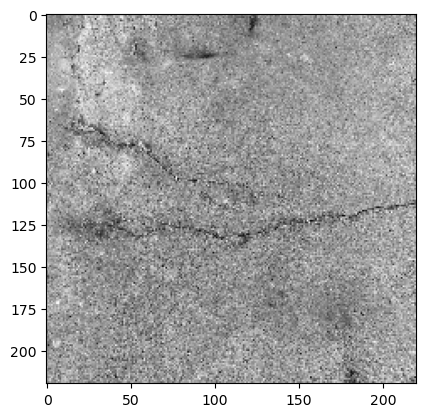

In [18]:
#Sample Cracked image

img = cv2.imread('Image/cracked/C (50).jpg', cv2.IMREAD_COLOR)    #read the image
img = cv2.resize(img, (220,220))     #resize the image to 220 by 220
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   #convert a color image represented in BGR color space to a grayscale image
img = img.astype(np.float32) - 127.5
img = img / 127.5      #scales the pixel values so that they fall within the range [-1, 1].

plt.imshow(img,cmap= 'gray')
plt.show()


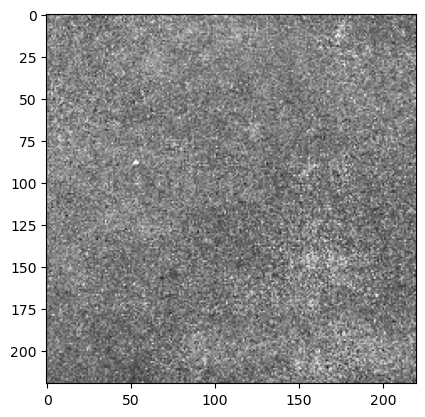

In [12]:
#Sample uncracked image
img = cv2.imread('Image/uncracked/U (102).jpg', cv2.IMREAD_COLOR)     #read the image
img = cv2.resize(img, (220,220))                 #resize the image to 220 by 220
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      #convert a color image represented in BGR color space to a grayscale image
img = img.astype(np.float32) - 127.5
img = img / 127.5                               #scales the pixel values so that they fall within the range [-1, 1].

plt.imshow(img,cmap= 'gray')
plt.show()


In [44]:
#Image Pre-Processing
# 1. Getting the list of images in Cracked and Uncracked folders with labels
# 2. resizing the images to 220x220 pixels
# 3. Changing to GrayScale (one channel)
# 4. Normalize Pixels to fall between -1 and 1
# 5. Randomly rotate and flip image to increase input size
# 6. Train Test Split

def prepare_cnn_data(folder_path, img_size):
    # Get list of subdirectories (i.e., class labels)
    subdirs = [subdir for subdir in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, subdir))]
    
    # Initialize arrays to hold images and labels
    images = []
    labels = []
    
    # Loop over subdirectories
    for i, subdir in enumerate(subdirs):
        # Get list of image file names in this subdirectory
        file_names = [os.path.join(folder_path, subdir, file_name) for file_name in os.listdir(os.path.join(folder_path, subdir))]
        
        # Loop over images
        for file_name in file_names:
            # Load image and resize to specified dimensions
            img = cv2.imread(file_name, cv2.IMREAD_COLOR)
            img = cv2.resize(img, img_size)
            
            # Convert image to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Center pixel values around zero
            img = img.astype(np.float32) - 127.5
            
            # Normalize pixel values to range -1 to 1
            img = img / 127.5
            
            # Add original image and label to arrays
            print(file_name)
            images.append(img)
            labels.append(i)
            
            # Randomly rotate and flip image to increase input size
            for j in range(5):
                # Randomly rotate image
                angle = np.random.randint(-10, 10)         #random angel for rotation
                M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1)
                img_rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))     #1st arg input image #2nd rotation matrix
                #3rd size of the output image
                
                # Randomly flip image
                flip_code = np.random.randint(-1, 2)
                img_flipped = cv2.flip(img_rotated, flip_code)
                #flip code 0 : flip vertically
                #flip code positive : flip horizontally
                #flip code negative: flip both horizontally and vertically
                
                # Add rotated and flipped image and label to arrays
                images.append(img_flipped)
                labels.append(i)
                
    # Convert arrays to TensorFlow format
    images = np.array(images)
    labels = np.array(labels)

    # Reshape images to add channel dimension
    images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))  
    #converts grayscale images from a 2D array to a 3D array with a single channel


    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

    return X_train, X_test, y_train, y_test

In [45]:
# Call the previous function
X_train, X_test, y_train, y_test = prepare_cnn_data('Image',(220,220))

Image\cracked\C (1).jpg
Image\cracked\C (10).jpg
Image\cracked\C (100).jpg
Image\cracked\C (101).jpg
Image\cracked\C (102).jpg
Image\cracked\C (103).jpg
Image\cracked\C (104).jpg
Image\cracked\C (105).jpg
Image\cracked\C (106).jpg
Image\cracked\C (107).jpg
Image\cracked\C (108).jpg
Image\cracked\C (109).jpg
Image\cracked\C (11).jpg
Image\cracked\C (110).jpg
Image\cracked\C (111).jpg
Image\cracked\C (112).jpg
Image\cracked\C (113).jpg
Image\cracked\C (114).jpg
Image\cracked\C (115).jpg
Image\cracked\C (116).jpg
Image\cracked\C (117).jpg
Image\cracked\C (118).jpg
Image\cracked\C (119).jpg
Image\cracked\C (12).jpg
Image\cracked\C (120).jpg
Image\cracked\C (121).jpg
Image\cracked\C (122).jpg
Image\cracked\C (123).jpg
Image\cracked\C (124).jpg
Image\cracked\C (125).jpg
Image\cracked\C (126).jpg
Image\cracked\C (127).jpg
Image\cracked\C (128).jpg
Image\cracked\C (129).jpg
Image\cracked\C (13).jpg
Image\cracked\C (130).jpg
Image\cracked\C (131).jpg
Image\cracked\C (132).jpg
Image\cracked\C (1

In [74]:
#removing one dimension (color channel) from the train test dataset
X_train = X_train[:,:,:,0]
X_test = X_test[:,:,:,0]

(6028, 220, 220)

In [93]:
X_test.shape

(1508, 220, 220)

In [83]:
X_train.shape

(6028, 220, 220)

In [95]:
image_shape = (220,220,1)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [101]:
#Defninign the model
model = Sequential()      #allows us to define a neural network layer-by-layer

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))  
#This adds a 2D convolutional layer to the model with 32 filters, a kernel size of 3x3

model.add(MaxPooling2D(pool_size=(2, 2)))
#This adds a 2D max pooling layer to the model with a pool size of 2x2.


model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
#This adds another 2D convolutional layer with 64 filters, a kernel size of 3x3

model.add(MaxPooling2D(pool_size=(2, 2)))
#This adds another 2D max pooling layer with a pool size of 2x2

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  
#This flattens the output from the convolutional layers into a 1D vector


model.add(Dense(128))
#This adds the output layer with a single neuron.

model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 218, 218, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 109, 109, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 51, 51, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 64)      

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [104]:
#Model Fit
results = model.fit(x = X_train,
                    y = y_train,
                    epochs= 20,
                    batch_size=16,
                    callbacks=[early_stop],
                    validation_data=(X_test,y_test))

Epoch 1/20
377/377 [==============================] - 188s 494ms/step - loss: 0.5121 - accuracy: 0.7407 - val_loss: 0.2923 - val_accuracy: 0.8826
Epoch 2/20
377/377 [==============================] - 186s 494ms/step - loss: 0.2461 - accuracy: 0.9043 - val_loss: 0.2065 - val_accuracy: 0.9105
Epoch 3/20
377/377 [==============================] - 183s 485ms/step - loss: 0.1459 - accuracy: 0.9477 - val_loss: 0.1400 - val_accuracy: 0.9503
Epoch 4/20
377/377 [==============================] - 183s 485ms/step - loss: 0.1110 - accuracy: 0.9625 - val_loss: 0.1198 - val_accuracy: 0.9536
Epoch 5/20
377/377 [==============================] - 183s 486ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 0.1383 - val_accuracy: 0.9496
Epoch 6/20
377/377 [==============================] - 184s 487ms/step - loss: 0.0508 - accuracy: 0.9821 - val_loss: 0.0982 - val_accuracy: 0.9675
Epoch 7/20
377/377 [==============================] - 186s 494ms/step - loss: 0.0441 - accuracy: 0.9842 - val_loss: 0.2229 -

<AxesSubplot: >

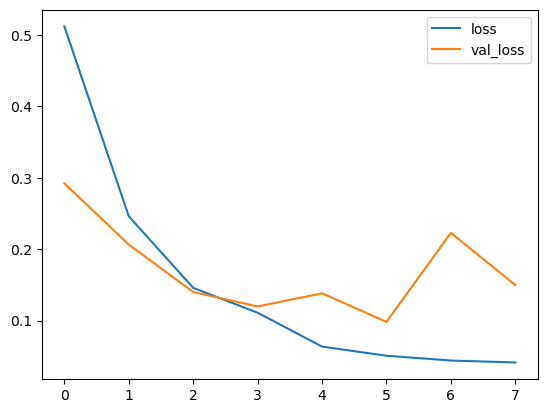

In [106]:
#Loss and Validation Loss
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [107]:
pred_probabilities = model.predict(X_test)

48/48 [==============================] - 11s 223ms/step


In [108]:
predictions = pred_probabilities > 0.5

In [110]:
#Validation 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       852
           1       0.95      0.96      0.96       656

    accuracy                           0.96      1508
   macro avg       0.96      0.96      0.96      1508
weighted avg       0.96      0.96      0.96      1508

[[819  33]
 [ 25 631]]
